In [10]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from tqdm.notebook import tqdm

In [1]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/content/drive/MyDrive/NotoSansKR-Black.otf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

Noto Sans KR


In [7]:
!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=095b5af3b40fe17368d599e5b3097c3506d4f9735e366adc07891b59dbc6f8b4
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [8]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [10]:
# 코랩에서 plotly가 보이지 않을 때 설정
# 해결방법: default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/csv/전환율.csv', index_col = 0)

In [ ]:
df

In [ ]:

sns.catplot(x='Category', y='전환율(%)', data=df, kind='bar', aspect = 3, height = 7);
plt.title('카테고리별 전환율', size = 30);

In [ ]:
df_musinsa = pd.read_csv('/content/drive/MyDrive/csv/musinsa_rank_data.csv', index_col = 0)
df_musinsa

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/csv/최종무신사데이터_1.csv', index_col = 0)
df_review

In [ ]:
df_review['상품명'] = df_review['상품번호']
df_review['브랜드명'] = df_review['상품번호']
df_review['대분류'] = df_review['상품번호']
df_review['중분류'] = df_review['상품번호']
df_review['할인전가격'] = df_review['상품번호']
df_review['할인후가격'] = df_review['상품번호']
df_review['좋아요'] = df_review['상품번호']
df_review['누적판매수'] = df_review['상품번호']
df_review['조회수'] = df_review['상품번호']
df_review


In [ ]:
dic = {}

for code, name, brand, cat, sub_cat, b_price, a_price, like, purchase, pageview in tqdm(zip(df_musinsa['상품고유코드'], 
                                                                                df_musinsa['상품명'],
                                                                                df_musinsa['브랜드명'], 
                                                                                df_musinsa['Category'], 
                                                                                df_musinsa['sub_Category'],
                                                                                df_musinsa['할인전가격'],
                                                                                df_musinsa['할인후가격'],
                                                                                df_musinsa['Countlike'],
                                                                                df_musinsa['purchase'],
                                                                                df_musinsa['pageview'])):
  dic[code] = [name, brand, cat, sub_cat, b_price, a_price, like, purchase, pageview]

  

0it [00:00, ?it/s]

In [ ]:
for num, code in tqdm(enumerate(df_review['상품번호'])):
  df_review['상품명'][num+1] = dic[code][0]
  df_review['브랜드명'][num+1] = dic[code][1]
  df_review['대분류'][num+1] = dic[code][2]
  df_review['중분류'][num+1] = dic[code][3]
  df_review['할인전가격'][num+1] = dic[code][4]
  df_review['할인후가격'][num+1] = dic[code][5]
  df_review['좋아요'][num+1] = dic[code][6]
  df_review['누적판매수'][num+1] = dic[code][7]
  df_review['조회수'][num+1] = dic[code][8]

In [ ]:
df_review

In [ ]:
df_review.to_csv('/content/drive/MyDrive/csv/데이터합산.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/데이터합산.csv', index_col = 0)
df

In [ ]:
# df = df[~df['키'].str.contains('*')]
df_user = df[df['성별'].str.contains('남성') | df['성별'].str.contains('여성')]

In [ ]:
# 1. 키와 몸무게에서 결측치 제거
# 2. 숫자화
# 3. 그래프로 나타내보기

In [ ]:
plt.rcParams["figure.figsize"] = (50,50)
sns.scatterplot(data=df, x="키", y="몸무게", hue="대분류")

In [ ]:
df_user = df_user.reset_index()
df_user

In [ ]:
df_user.drop('index', axis = 1, inplace = True)
df_user

In [ ]:
df_user['키'] = df_user['키'].str.replace('cm', '')
df_user['몸무게'] = df_user['몸무게'].str.replace('kg', '')

In [ ]:
df_user['키'] = df_user['키'].astype(int)
df_user['몸무게'] = df_user['몸무게'].astype(int)

In [ ]:
df_user.dtypes

In [ ]:
df_user.to_csv('/content/drive/MyDrive/csv/키,몸무게.csv')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

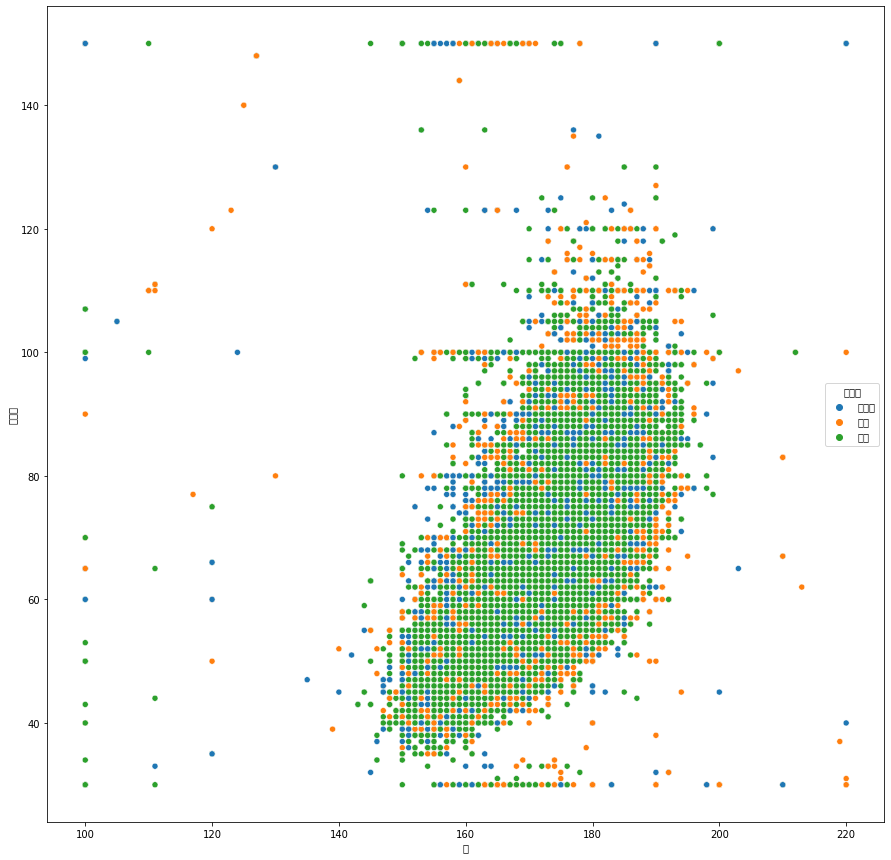

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
sns.scatterplot(data=df_user, x="키", y="몸무게", hue="대분류")

In [ ]:
# 키 140이하, 200이상 제거
# 몸무게 35이하, 125이상 제거
# 분류 나오게

In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/csv/키,몸무게.csv', index_col = 0)

In [ ]:
df_user

In [ ]:
df_user = df_user[(df_user['키'] > 140) & (df_user['키'] < 200)] # &으로 연결해줄때 괄호가 들어가야함!
df_user = df_user[(df_user['몸무게'] > 35) & (df_user['몸무게'] < 125)]

In [ ]:
df_user

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

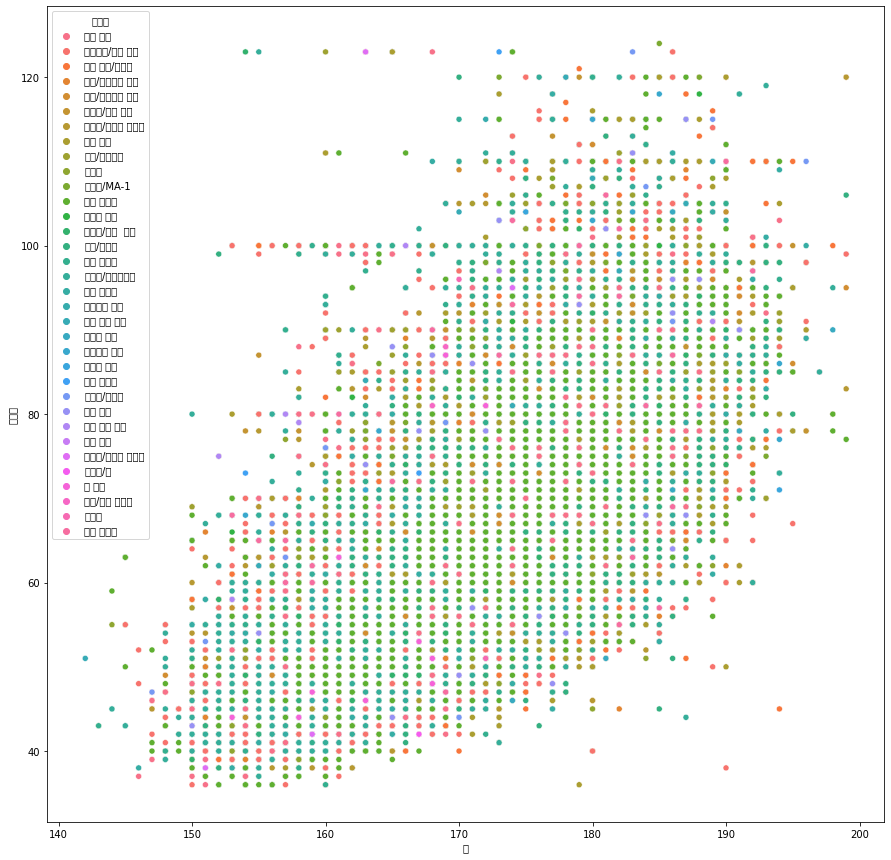

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
sns.scatterplot(data=df_user, x="키", y="몸무게", hue="중분류")

In [ ]:
df_user

,상품번호,성별,키,몸무게,구매한 사이즈,평점,구매날짜,상품명,브랜드명,대분류,중분류,할인전가격,할인후가격,좋아요,누적판매수,조회수
0,1778404,남성,182,72,XL,2.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
1,1778404,남성,183,80,XL,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
2,1778404,남성,177,62,L,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
3,1778404,남성,174,67,L,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
4,1778404,남성,175,71,L,4.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292248,1547899,남성,178,76,M,5.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292249,1547899,남성,178,81,L,5.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292250,1547899,남성,169,65,M,4.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292251,1547899,남성,175,71,M,5.0,2022.01.01,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283


In [ ]:
# df_user['키'] = df_user['키'].astype(str)
# df_user['몸무게'] = df_user['몸무게'].astype(str)

In [ ]:
df_user

,상품번호,성별,키,몸무게,구매한 사이즈,평점,구매날짜,상품명,브랜드명,대분류,중분류,할인전가격,할인후가격,좋아요,누적판매수,조회수
0,1778404,남성,182,72,XL,2.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
1,1778404,남성,183,80,XL,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
2,1778404,남성,177,62,L,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
3,1778404,남성,174,67,L,5.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
4,1778404,남성,175,71,L,4.0,7일 전,2WAY 스웻 후드 집업 (MELANGE GREY),토피,아우터,후드 집업,"45,000원","39,900원",108964,134274,431174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292248,1547899,남성,178,76,M,5.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292249,1547899,남성,178,81,L,5.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292250,1547899,남성,169,65,M,4.0,2022.01.02,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283
292251,1547899,남성,175,71,M,5.0,2022.01.01,V.S.C HOOD SWEAT_MARYS_3% MELANGE GRAY,아웃스탠딩,상의,후드 티셔츠,"79,000원","63,200원",16543,4491,13283


In [ ]:
df_user_gb = df_user.groupby(['중분류', '키', '몸무게']).size()
df_user_gb = pd.DataFrame(df_user_gb)


In [ ]:
df_user_gb = df_user_gb.reset_index()

In [ ]:
df_user_gb

,중분류,키,몸무게,0
0,겨울 기타 코트,150,45,1
1,겨울 기타 코트,151,43,1
2,겨울 기타 코트,152,43,1
3,겨울 기타 코트,152,55,1
4,겨울 기타 코트,152,75,1
...,...,...,...,...
28733,후드 티셔츠,195,85,2
28734,후드 티셔츠,196,98,1
28735,후드 티셔츠,198,78,1
28736,후드 티셔츠,198,80,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

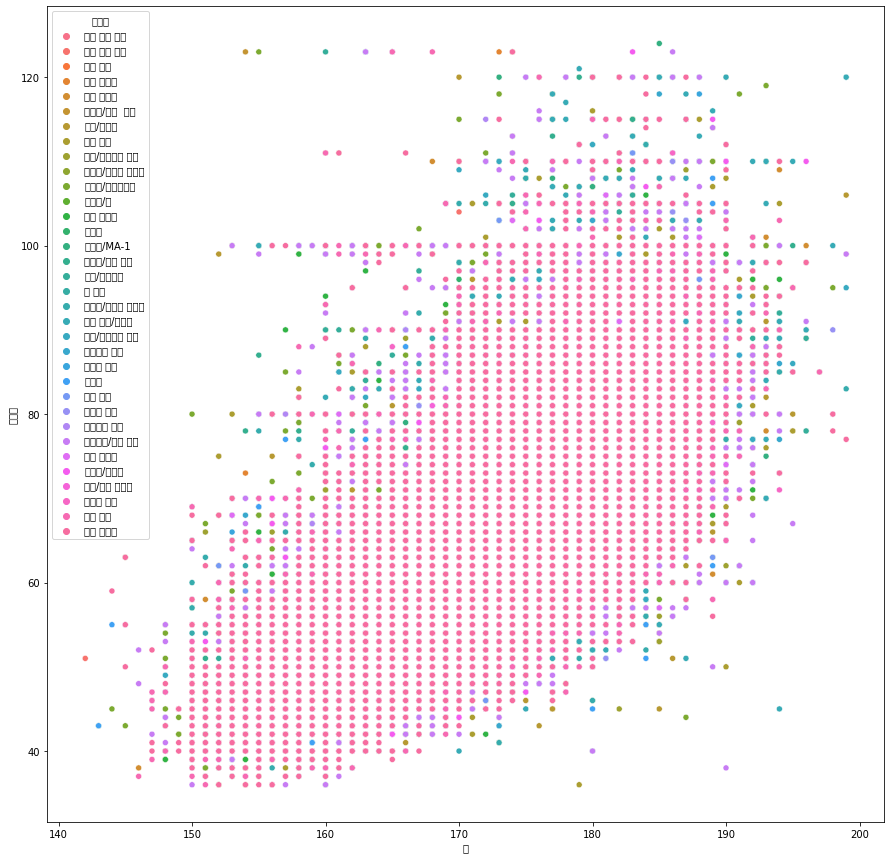

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
sns.scatterplot(data=df_user_gb, x="키", y="몸무게", hue="중분류")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_te

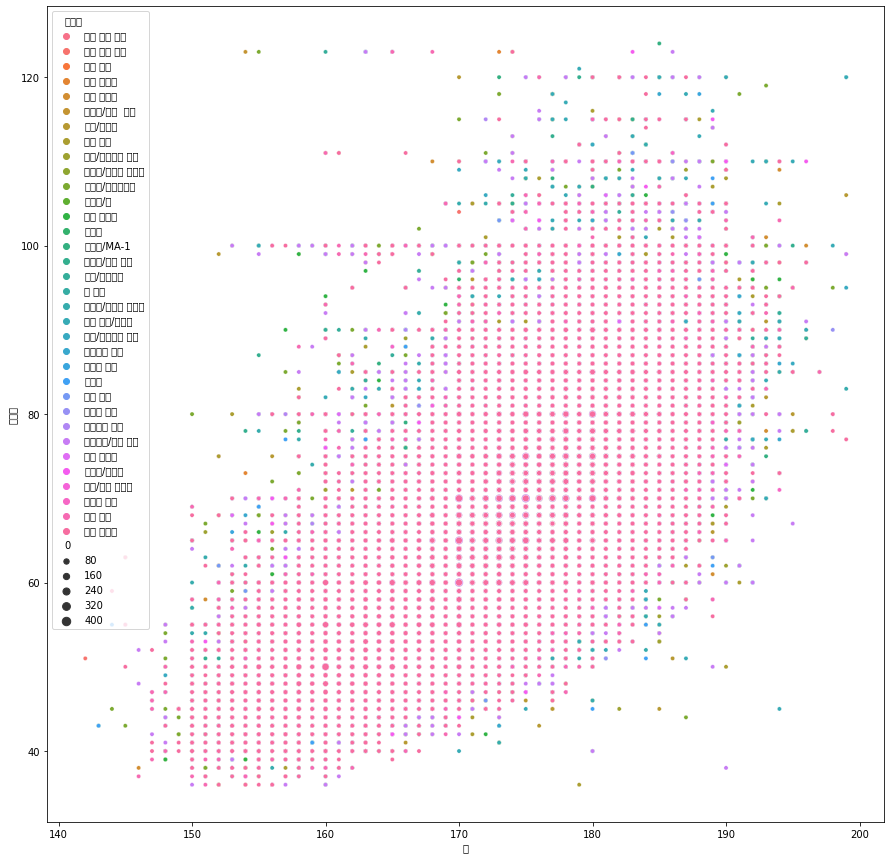

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
sns.scatterplot(data=df_user_gb, x="키", y="몸무게", hue="중분류", size = 0)

In [ ]:
# 1개짜리 삭제? 하면 더 예쁘게 나올것 같기두

In [ ]:
# 중분류 합치기?
df_user['브랜드명']

0            토피
1            토피
2            토피
3            토피
4            토피
          ...  
292248    아웃스탠딩
292249    아웃스탠딩
292250    아웃스탠딩
292251    아웃스탠딩
292252    아웃스탠딩
Name: 브랜드명, Length: 291579, dtype: object